In [1]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import numpy as np
import os
import zipfile
import xlrd
import plotly.express as px
import re
from scipy import stats

sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid')

In [2]:
df = pd.read_csv(r'datasets/3.6 london.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [5]:
df.timestamp =pd.to_datetime(df.timestamp)

In [6]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [7]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

<Axes: xlabel='timestamp', ylabel='cnt'>

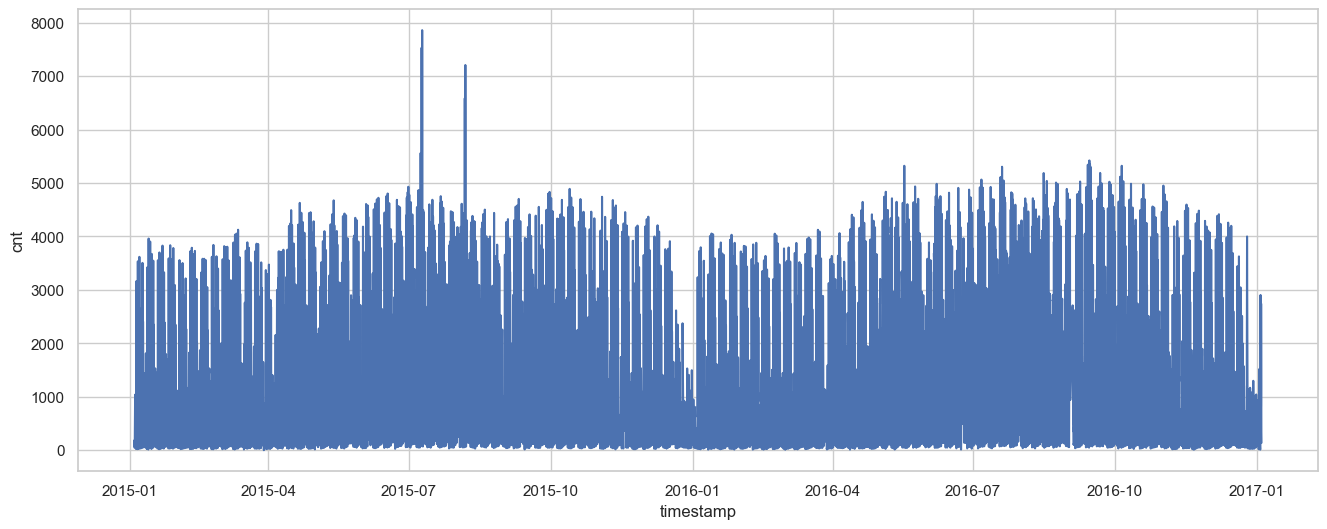

In [9]:
sns.lineplot(data=df, x='timestamp', y='cnt')

<Axes: xlabel='timestamp', ylabel='cnt'>

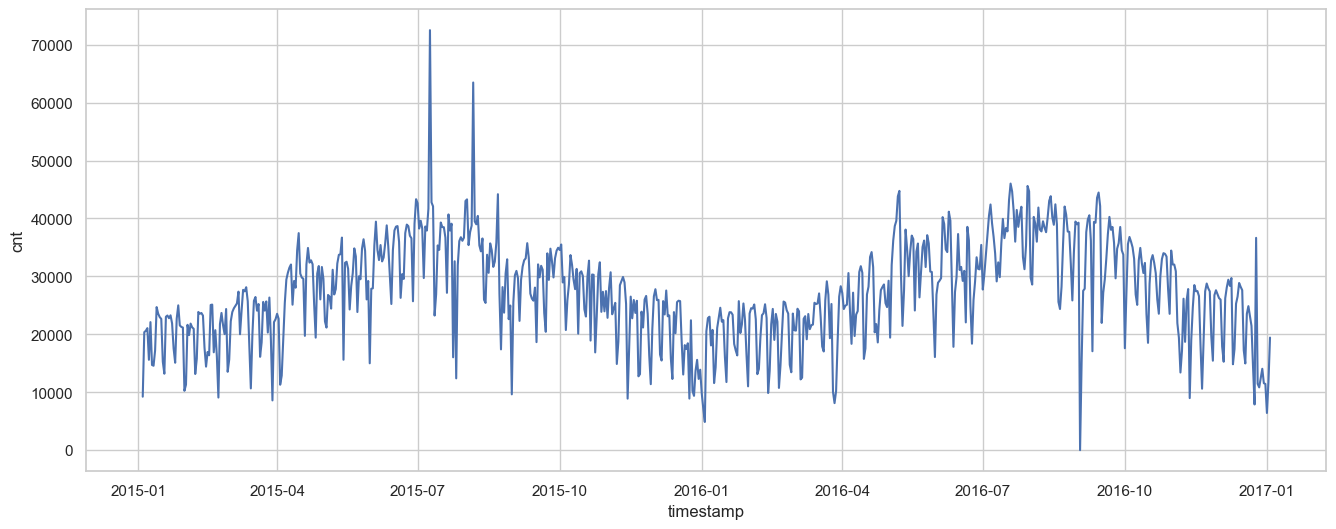

In [10]:
sns.lineplot(data=df.resample('D', on='timestamp').sum(), x='timestamp', y='cnt')

In [11]:
df.set_index('timestamp', drop=False, inplace=True)

<Axes: xlabel='timestamp', ylabel='cnt'>

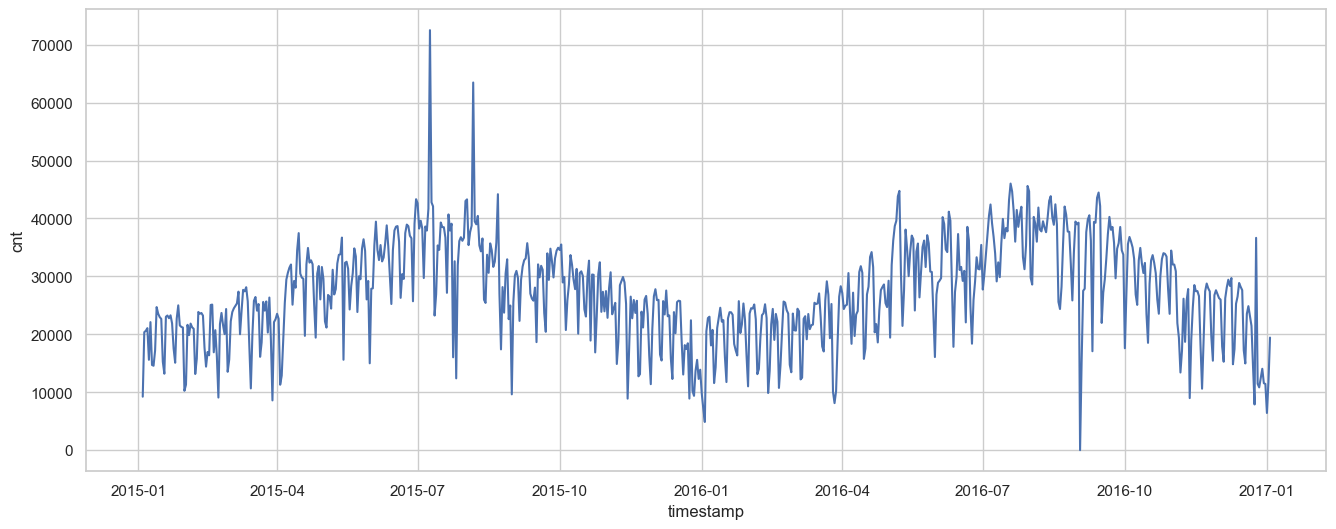

In [12]:
sns.lineplot(data=df.resample('D').agg({'cnt':'sum'}), x='timestamp', y='cnt')

In [13]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [55]:
df2 = df.resample('D').agg({'cnt':'sum'}).rolling(window=3).mean()
df1 = df.resample('D').agg({'cnt':'sum'})

In [56]:
df1

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


In [57]:
df.resample('D').agg({'cnt':'sum'}).rolling(window=3,min_periods=1).mean().query('timestamp == "2015-07-09"')

C:\Users\Илья\AppData\Local\Temp\ipykernel_2864\2460679427.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.resample('D').agg({'cnt':'sum'}).rolling(window=3,min_periods=1).mean().query('timestamp == "2015-07-09"')


,cnt
timestamp,
2015-07-09,50705.0


<Axes: xlabel='timestamp'>

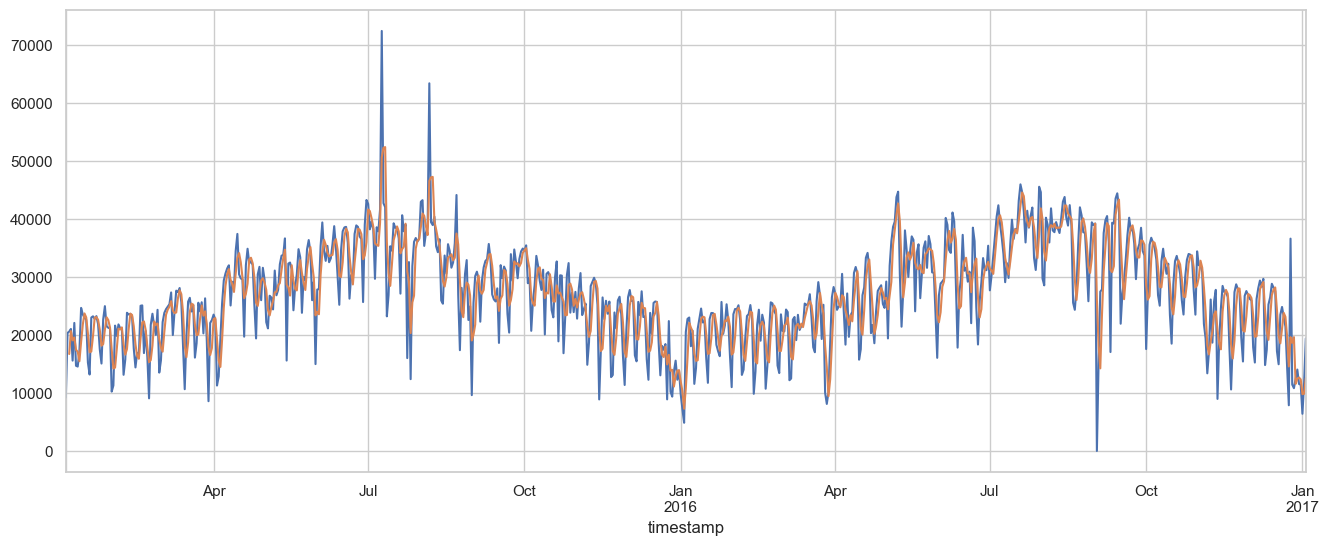

In [58]:
df1.cnt.plot()
df2.cnt.plot()

In [59]:
std = np.std(df1.cnt - df2.cnt)

In [60]:
df1['upper_bound'] = df2.cnt + 2.576*std
df1['lower_bound'] = df2.cnt - 2.576*std

In [61]:
df1.tail()

,cnt,upper_bound,lower_bound
timestamp,,,
2016-12-30,11566,24424.919188,939.080812
2016-12-31,11424,24090.252521,604.414146
2017-01-01,6421,21546.585854,-1939.252521
2017-01-02,11823,21632.252521,-1853.585854
2017-01-03,19436,24302.919188,817.080812


In [67]:
df1[df1.cnt > df1.upper_bound]

,cnt,upper_bound,lower_bound
timestamp,,,
2015-07-09,72504,62447.919188,38962.080812
2015-08-06,63468,58370.252521,34884.414146
2016-09-04,27512,26001.919188,2516.080812
2016-12-25,36653,31393.585854,7907.747479
